<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Regularization


---

## Learning Objectives

### Core
- Address overfitting problems with regularization
- Learn about the main types of regularization
- Understand the impact of reguralization on the model quality and the coefficients
- Implement regularization in sklearn

### Target
- Visualize the effect of regularization on the coefficients and the model scores

### Stretch
- Understand how regularization impacts the formulas for the model coefficients


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Overview-of-regularization" data-toc-modified-id="Overview-of-regularization-2">Overview of regularization</a></span></li><li><span><a href="#Review:-least-squares-loss-function" data-toc-modified-id="Review:-least-squares-loss-function-3">Review: least squares loss function</a></span></li><li><span><a href="#The-Ridge-penalty" data-toc-modified-id="The-Ridge-penalty-4">The Ridge penalty</a></span></li><li><span><a href="#The-Lasso-penalty" data-toc-modified-id="The-Lasso-penalty-5">The Lasso penalty</a></span></li><li><span><a href="#Elastic-Net-penalty" data-toc-modified-id="Elastic-Net-penalty-6">Elastic Net penalty</a></span></li><li><span><a href="#What-is-the-effect-of-regularization?" data-toc-modified-id="What-is-the-effect-of-regularization?-7">What is the effect of regularization?</a></span></li><li><span><a href="#Making-predictions" data-toc-modified-id="Making-predictions-8">Making predictions</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn-notation" data-toc-modified-id="Scikit-learn-notation-8.1">Scikit-learn notation</a></span></li><li><span><a href="#Load-the-wine-csv" data-toc-modified-id="Load-the-wine-csv-8.2">Load the wine csv</a></span></li></ul></li><li><span><a href="#Create-a-train-test-split" data-toc-modified-id="Create-a-train-test-split-9">Create a train-test split</a></span></li><li><span><a href="#Standardizing-predictors-is-required" data-toc-modified-id="Standardizing-predictors-is-required-10">Standardizing predictors is required</a></span></li><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-11">Model fitting</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-11.1">Linear Regression</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-11.2">Ridge</a></span></li><li><span><a href="#The-Lasso" data-toc-modified-id="The-Lasso-11.3">The Lasso</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-11.4">Elastic Net</a></span></li></ul></li><li><span><a href="#Visualizing-the-Ridge" data-toc-modified-id="Visualizing-the-Ridge-12">Visualizing the Ridge</a></span></li><li><span><a href="#Visualizing-the-Lasso" data-toc-modified-id="Visualizing-the-Lasso-13">Visualizing the Lasso</a></span></li><li><span><a href="#Visualizing-the-Elastic-Net" data-toc-modified-id="Visualizing-the-Elastic-Net-14">Visualizing the Elastic Net</a></span></li><li><span><a href="#Visualizing-how-the-R2-score-changes-with-the-regularization-strength" data-toc-modified-id="Visualizing-how-the-R2-score-changes-with-the-regularization-strength-15">Visualizing how the R2 score changes with the regularization strength</a></span><ul class="toc-item"><li><span><a href="#Ridge" data-toc-modified-id="Ridge-15.1">Ridge</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-15.2">Lasso</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-15.3">Elastic Net</a></span></li></ul></li><li><span><a href="#Determining-the-best-regularization-strength-with-cross-validation" data-toc-modified-id="Determining-the-best-regularization-strength-with-cross-validation-16">Determining the best regularization strength with cross validation</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-17">Conclusions</a></span></li></ul></div>

## Overview of regularization

---

We started building complex models with many predictors. However our models will not get necessarily better with the inclusion of more predictors since we run into the danger of overfitting. We can carefully test all combinations of predictors and single out the best one but that might be inefficient with increasing number of possibilities. Also it becomes challenging to control for correlations among the predictors which could pose additional numerical and algebraic problems.

Regularization follows a slightly different strategy. We take all available predictors into account but keep their influence under control. According to which regularization method we choose we will either eliminate some of the predictors completely or suppress their influence by driving their model coefficients to smaller values. We do this by modifying the underlying optimization procedure by adding so-called penalty terms to the loss function, i.e. the residual sum of squares. As a result we will obtain different beta coefficients. Predictions however are going to be made in exactly the same way as before. 

The two most common types of regularization are the **Lasso** and **Ridge**. There is a mixture of them called the **Elastic Net**. We will take a look at the mathematics of regularization and the effect these penalties have on model fits.


## Review: least squares loss function

---

Ordinary least squares regression minimizes the residual sum of squares (RSS) to fit the data:

$$ \text{minimize:}\; {\rm RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p X_{ij}\beta_j\right)\right)^2 $$

where our model predictions for $y$ are based on the sum of the $\beta_0$ intercept and the products of $\beta_j$ with $X_{ij}$.

Alternatively, in matrix notation using the predictor matrix $X$, the residuals $\epsilon$ and the vector of beta coefficients $\beta$ we write the same equation as

$$ \text{minimize:}\; {\rm RSS} = \epsilon^T \epsilon = (y - X\beta)^T (y - X\beta ) $$

The derivative with respect to all the beta coefficients becomes

$$ \frac{\partial RSS}{\partial \beta} = -2X^T y + 2X^T X\beta $$

Setting equal to zero and solving for the beta coefficient vector gives

$$\beta = (X^T X)^{-1}X^T y $$

## The Ridge penalty

---

Ridge regression adds the sum of the squared (non-intercept!) $\beta$ values to the loss function

$$ \text{minimize:}\; {\rm RSS+Ridge} = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

where $\beta_j^2$ is the squared coefficient for variable $X_j$.

$\sum_{j=1}^n \beta_j^2$ is the sum of these squared coefficients for every variable we have in our model. This does **not** include the intercept $\beta_0$.

$\lambda_2$ is a constant for the _strength_ of the regularization parameter. The higher this value, the greater the impact of this new component in the loss function. If this were zero, then we would revert back to just the least squares loss function. If this were, say, a billion, then the residual sum of squares component would have a much smaller effect on the loss/cost than the regularization term.

With the penalty added the RSS is referred to as the **penalized residual sum of squares (PRSS)**. In matrix format the Ridge PRSS is:

$$ \text{Ridge PRSS} = (y - X\beta)^T (y - X\beta) + \lambda_2 \; \left\|\beta\right\|^2_2 $$

where $\left\|\beta\right\|_2^2$ is the so-called L2-norm of the coefficient vector (again, excluding intercept).

The derivative with respect to all the beta coefficients becomes

$$ \frac{\partial PRSS}{\partial \beta} = -2X^T y + 2X^T X\beta + 2\lambda_2 \beta$$

Setting equal to zero and solving for the beta coefficient vector gives

$$\beta = (X^T X + \lambda_2\mathbb{1})^{-1}X^T y $$

# in another words, Ridge PRSS = RSS + MSE

## The Lasso penalty

---

The Lasso regression takes a different approach. Instead of adding the sum of _squared_ $\beta$ coefficients to the RSS, one adds the sum of the _absolute values_ of the $\beta$ coefficients:

$$ \text{minimize:}\; {\rm RSS + Lasso} = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p X_{ij}\beta_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

where $|\beta_j|$ is the absolute value of the $\beta$ coefficient for variable $X_j$ (this is often called the L1-norm). $\lambda_1$ is again the strength of the regularization penalty component in the loss function. 

**In matrix format the Lasso PRSS is:**

$$ \text{Lasso PRSS} = (y - X\beta)^T (y - X\beta) + \lambda_1 \; \left\|\beta\right\|_1 $$

where 

$$\left\|\beta\right\|_1=\sum_{j=1}^p |\beta_j|$$ 

Unlike the Ridge, however, there is not a closed-form solution for the Lasso beta coefficients.

# Lasso PRSS = RSS + MAE

## Elastic Net penalty

---

Elastic Net is a combination of the Lasso and the Ridge regularizations. It adds *both* penalties to the loss function:

$$ \begin{eqnarray*}
\text{minimize:}\; {\rm RSS + Ridge + Lasso} &=& \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p X_{ij}\beta_j\right)\right)^2 \\
&&+ \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2
\end{eqnarray*}
$$

In the elastic net, the effect of the Ridge versus the Lasso is balanced by the two $\lambda$-parameters. 

## What is the effect of regularization?

---

**To demonstrate the effects we will be using a dataset on wine quality.**

An important aspect of this data, which is a reason why we might choose to use regularization, is that there is **multicollinearity** in the data. The term multicollinearity means that there are high correlations between predictor variables. 

**This can lead to a variety of problems including:**
1. The effect of predictor variables estimated by your regression will depend on what other variables are included in your model.
2. Predictors can have wildly different effects depending on the observations in your sample, and small changes in samples can result in very different estimated effects.
3. With very high multicollinearity, the inverse matrix calculated by the computer may not be accurate.
4. We can no longer interpret a coefficient on a variable as the effect on the target of a one unit increase in that variable holding the other variables constant. This is because when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

The Ridge is best suited to deal with multicollinearity. Lasso also deals with multicollinearity between variables, but in a more brutal way (it "zeroes out" the less effective variable).

The Lasso is particularly useful when you have redundant or unimportant variables. If you have 1000 variables in a dataset the Lasso can perform "feature selection" automatically for you by forcing coefficients to be zero.

# The wine data has multicollinearity（多重共线性）

## Making predictions

Whereas regularized models will come up with different model coefficients, predictions are still made in the usual way using

$$
\hat{y} = X\beta = \beta_0 + \beta_1 X_1+\ldots +\beta_p X_p
$$

### Scikit-learn notation

In scikit-learn the Lasso and Ridge coefficients are referred to as `alpha`.

The elastic net penalty coefficients are parametrized as 

$$
\begin{eqnarray*}
\lambda_1 &=& \alpha\ {\rm l1ratio}\\
\lambda_2 &=& \frac{\alpha}{2}\ (1-{\rm l1ratio})
\end{eqnarray*}
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the wine csv

This version has red and white wines concatenated together and tagged with a binary 1,0 indicator (1 is red wine). There are many other variables which one could use to rate the quality of the wine.

In [2]:
wine = pd.read_csv(
    '../../../../resource-datasets/wine_data/winequality_merged.csv')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [3]:
# replace spaces in column names and convert all columns to lowercase:
wine.columns = [x.lower().replace(' ', '_') for x in wine.columns]
wine.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [4]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


**Look at the correlation between variables.**

In [5]:
wine_corr = wine.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


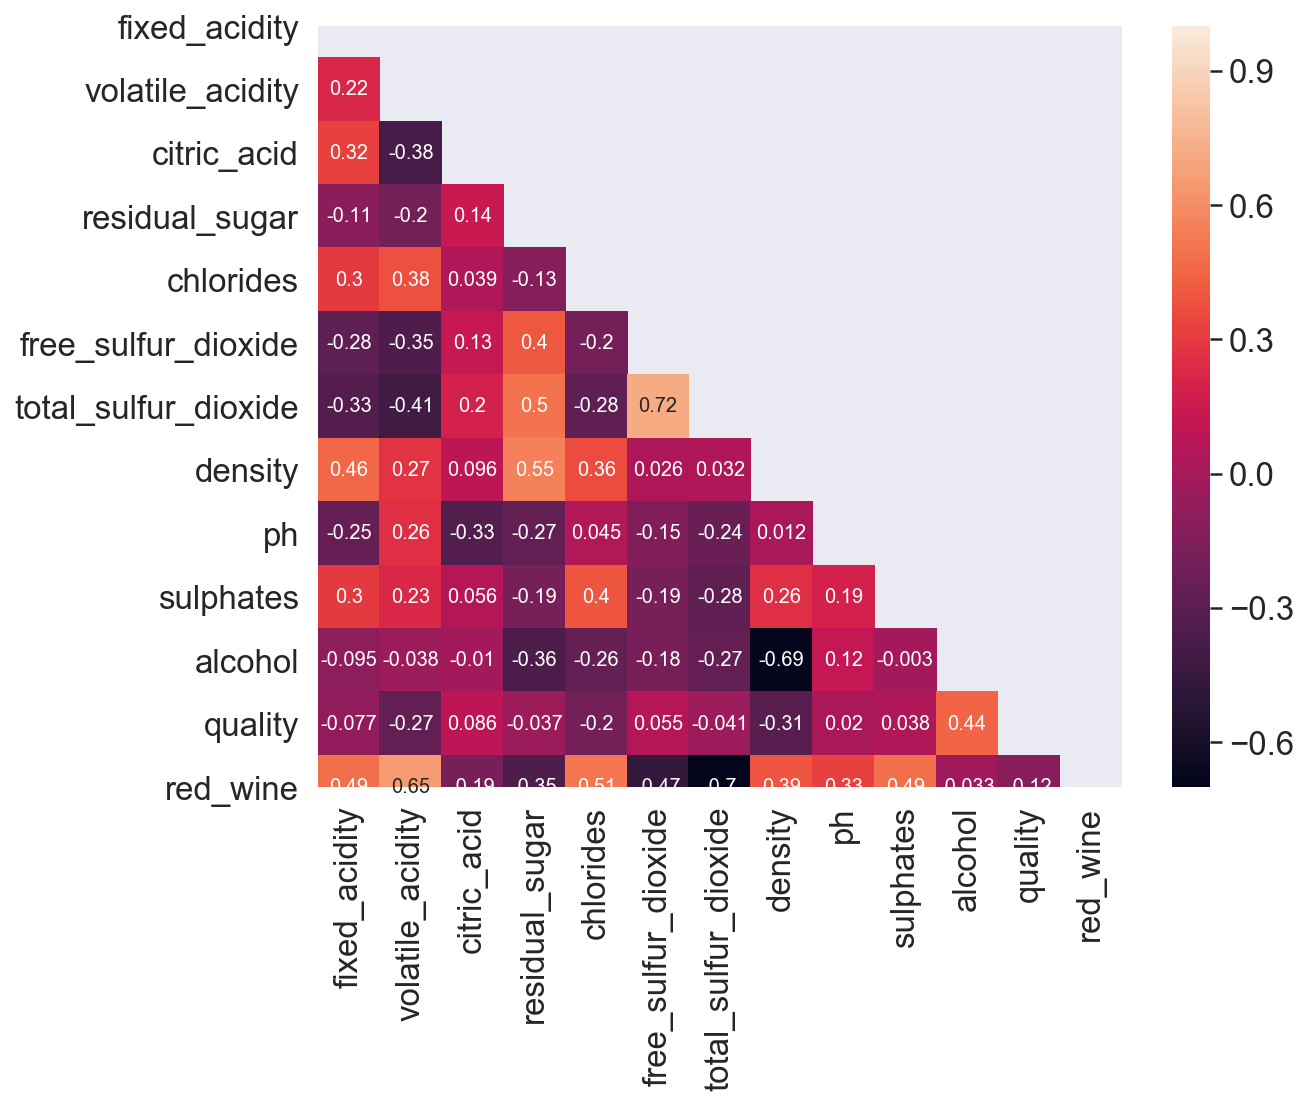

In [6]:
# Set the  matplotlib figure size:
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.heatmap(wine_corr, mask=mask, annot=True, ax=ax)

plt.show()

## Create a train-test split

We split the data into training and test sets. We are going to use the training set to determine the best model and then evaluate its performance on the test set.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# choose the target variable
y = wine.pop('quality')

# create the train-test split
wine_train, wine_test, y_train, y_test = train_test_split(
    wine, y, test_size=0.2, random_state=1)
print(wine_train.shape, wine_test.shape, y_train.shape, y_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


## Standardizing predictors is required

---

With the Lasso and Ridge it is necessary to standardize the predictor columns before constructing the models, even the dummy coded categorical variables. 

In unregularized linear regression, rescaling the predictor variables will be compensated by the opposite scaling of the coefficients. With regularization, this is no longer the case. Therefore standardizing your predictors is mandatory. 


Note that we use `.fit_transform` on the training set, but only `.transform` on the test set. In this way we infer the mean and standard deviation from the training set only, and use them to rescale the test set. We do not infer the mean and standard deviation from the combined sets since with the train-test split we want to simulate having completely unknown data.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(
    wine_train), columns=wine_train.columns)
X_test = pd.DataFrame(scaler.transform(wine_test), columns=wine_train.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [11]:
X_train.describe().loc[['mean', 'std'], :]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
mean,-6.672020e-16,-2.136277e-20,2.439842e-16,4.272553e-19,1.350554e-16,1.113641e-16,-5.937781e-17,3.950928e-14,1.533686e-16,-4.777997e-16,1.388067e-15,3.176857e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00


In [12]:
X_test.describe().loc[['mean', 'std'], :]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
mean,-0.013619,-0.028778,0.024026,0.038238,-0.050498,-0.004676,0.032996,0.002740,-0.008882,-0.040971,-0.021594,-0.050927
std,1.003063,0.995719,1.005002,1.039889,0.934571,0.964362,0.992696,1.014083,1.013424,0.952416,1.012480,0.969273


## Model fitting

Let's create a useful function which evaluates our model and returns the scores.

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
def model_fitter(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    cv_score = (np.mean(cross_val_score(model, X_train, y_train, cv=cv)))
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return cv_score, training_score, test_score

### Linear Regression

Let's first check how the standard linear regression performs.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model_fitter(model, X_train, y_train, X_test, y_test)

(0.2937527728500178, 0.3003791288683392, 0.27724103468062944)

### Ridge

In [17]:
from sklearn.linear_model import Ridge

In [18]:
model = Ridge(alpha=1.0)
model_fitter(model, X_train, y_train, X_test, y_test)

(0.29377768266573445, 0.3003789080127256, 0.2772344559877724)

### The Lasso

In [19]:
from sklearn.linear_model import Lasso

In [20]:
model = Lasso(alpha=0.01)
model_fitter(model, X_train, y_train, X_test, y_test)

(0.2875707436048437, 0.29284760242486385, 0.2691735441408075)

### Elastic Net

In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
model = ElasticNet(alpha=0.1, l1_ratio=0.05)
model_fitter(model, X_train, y_train, X_test, y_test)

(0.28650184588027433, 0.2909751810655905, 0.2707506035286861)

## Visualizing the Ridge

---

This function iterates over a series of different alpha regularization parameters. The alpha is scikit-learn's equivalent of the $\lambda$-value in the formula that multiplies the square of betas from the equation.

The function stores the results of the model so that we can plot them interactively.

In [23]:
def ridge_coefs(X, Y, alphas):

    # set up the list to hold the different sets of coefficients:
    coefs = []

    # Iterate through the alphas fed into the function:
    for a in alphas:

        # Set up a ridge regression object
        ridge_reg = Ridge(alpha=a)
    
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)

        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)

    return coefs

Alpha values for the ridge are best visualized on a logarithmic  scale. Essentially, the effect of alpha on the coefficients does not increase linearly but by orders of magnitude. 

In [24]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train, y_train, r_alphas)

In [25]:
# the number of models tried
len(r_coefs)

200

In [26]:
# the number of coefficients determined by each model
r_coefs[0].shape

(12,)

The plotting function below will:

 - Plot the effect of changing alpha on the coefficient size on a **path** graph
 - Plot the effect of changing alpha on the coefficient size on a **bar** graph
 
Each one gives similar information. It's just two different ways of visualizing the same thing. The chart is interactive so you can play around with the values of alpha across the specified range above.

In [27]:
# The cycler package lets us "cycle" throug colors.
# Just another thing to look up on stackoverflow. That's the life of a data scientist.
from cycler import cycler


def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):

    # Get the full range of alphas before subsetting to keep the plots from
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)

    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]

    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))

    # Get the figure and reset the size to be wider:
    fig, ax = plt.subplots(ncols=2, figsize=(18,5))

    # Give it the color cycler:
    ax[0].set_prop_cycle(cycler('color', colors))

    # Print a vertical line showing our current alpha threshold:
    ax[0].axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)

    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax[0].plot(alphas, coefs, lw=2)

    # set labels for axes:
    ax[0].set_xlabel('alpha', fontsize=20)
    ax[0].set_ylabel('coefficients', fontsize=20)

    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax[0].set_xscale('log')

    # Enforce the axis limits:
    ax[0].set_xlim([amin, amax])

    # Put a title on the axis
    ax[0].set_title(regtype+' coef paths\n', fontsize=20)

    # Get the ymin and ymax for this axis to enforce it to be the same on the
    # second chart:
    ymin, ymax = ax[0].get_ylim()

    # Position the bars according to their index from the feature names variable:
    ax[1].bar(list(range(1, len(feature_names)+1)),
            coefs[-1], align='center', color=colors)
    ax[1].set_xticks(list(range(1, len(feature_names)+1)))

    # Reset the ticks from numbers to acutally be the names:
    ax[1].set_xticklabels(feature_names, rotation=65, fontsize=12)

    # enforce limits and add titles, labels
    ax[1].set_ylim([ymin, ymax])
    ax[1].set_title(regtype+' predictor coefs\n', fontsize=20)
    ax[1].set_xlabel('coefficients', fontsize=20)
    ax[1].set_ylabel('value', fontsize=20)

    return fig, ax

Load the ipython widgets so we can make this plotting function interactive!

In [28]:
from ipywidgets import *
from IPython.display import display

The function and `interact` from ipywidgets lets us take some specified alphas that we have already calculated the coefficients for and plot them out.

In [29]:
def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X_train.columns,
                 10**log_of_alpha, regtype='ridge')

In [30]:
interact(ridge_plot_runner, log_of_alpha=(0.0001, 5.0, 0.05))

interactive(children=(FloatSlider(value=0.0001, description='log_of_alpha', max=5.0, min=0.0001, step=0.05), O…

<function __main__.ridge_plot_runner(log_of_alpha=0)>

## Visualizing the Lasso

---

Now we do the same thing as above but for the Lasso. You will be able to see how the coefficients change differently for both.

In [31]:
from sklearn.linear_model import Lasso

In [32]:
# This is the same as the ridge coefficient by alpha calculator
def lasso_coefs(X, Y, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg = Lasso(alpha=a)
        lasso_reg.fit(X, Y)
        coefs.append(lasso_reg.coef_)

    return coefs

Alphas for the Lasso tend to effect regularization linearly rather than by orders of magnitude like in the ridge. 

A linear series of alphas is sufficient.

In [33]:
l_alphas = np.arange(0.001, 0.15, 0.0025)
l_coefs = lasso_coefs(X_train, y_train, l_alphas)

Run the same plotting function above, but now with the calculated coefficients of alpha for the Lasso.

In [34]:
def lasso_plot_runner(alpha=0):
    coef_plotter(l_alphas, l_coefs, X_train.columns, alpha, regtype='lasso')


interact(lasso_plot_runner, alpha=(0.001, 0.2, 0.0025))

interactive(children=(FloatSlider(value=0.001, description='alpha', max=0.2, min=0.001, step=0.0025), Output()…

<function __main__.lasso_plot_runner(alpha=0)>

## Visualizing the Elastic Net

---

Recall that the Elastic Net combines the Ridge and Lasso penalties.

`ElasticNet` in sklearn has two parameters:
- `alpha`: the regularization strength.
- `l1_ratio`: the amount of L1 versus L2 penalty. An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.


In [35]:
from sklearn.linear_model import ElasticNet

Calculate the coefficients with both alpha values and an l1_ratio of 0.05. Lasso can "overpower" the Ridge penalty in some datasets, and so rather than an equal balance just add a little bit of Lasso in.

In [36]:
# This is the same as the ridge coefficient by alpha calculator
def elasticnet_coefs(X, Y, alphas, l1_ratio=0.1):
    
    coefs = []
    
    for a in alphas:
        enet_reg = ElasticNet(alpha=a, l1_ratio=l1_ratio)
        enet_reg.fit(X, Y)
        coefs.append(enet_reg.coef_)

    return coefs

In [37]:
enet_alphas = np.arange(0.01, 1.0, 0.005)
enet_coefs = elasticnet_coefs(X_train, y_train, enet_alphas, l1_ratio=0.1)

In [38]:
def enet_plot_runner(alpha=0.01):
    coef_plotter(enet_alphas, enet_coefs, X_train.columns,
                 alpha, regtype='elastic net')


interact(enet_plot_runner, alpha=(0.0001, 1.0, 0.005))

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.0, min=0.0001, step=0.005), Output())…

<function __main__.enet_plot_runner(alpha=0.01)>

## Visualizing how the R2 score changes with the regularization strength

Ultimately we want to determine for which regularization strength the model generalizes best. This is determined through cross validation. Let's depict how the score changes with the regularization strength.

In [39]:
def alpha_scores(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, alpha_values=np.logspace(-10, 10, 21)):
    scores = []
    for alpha in alpha_values:
        scores.append(model_fitter(
            model(alpha), X_train, y_train, X_test, y_test))
    return scores

### Ridge

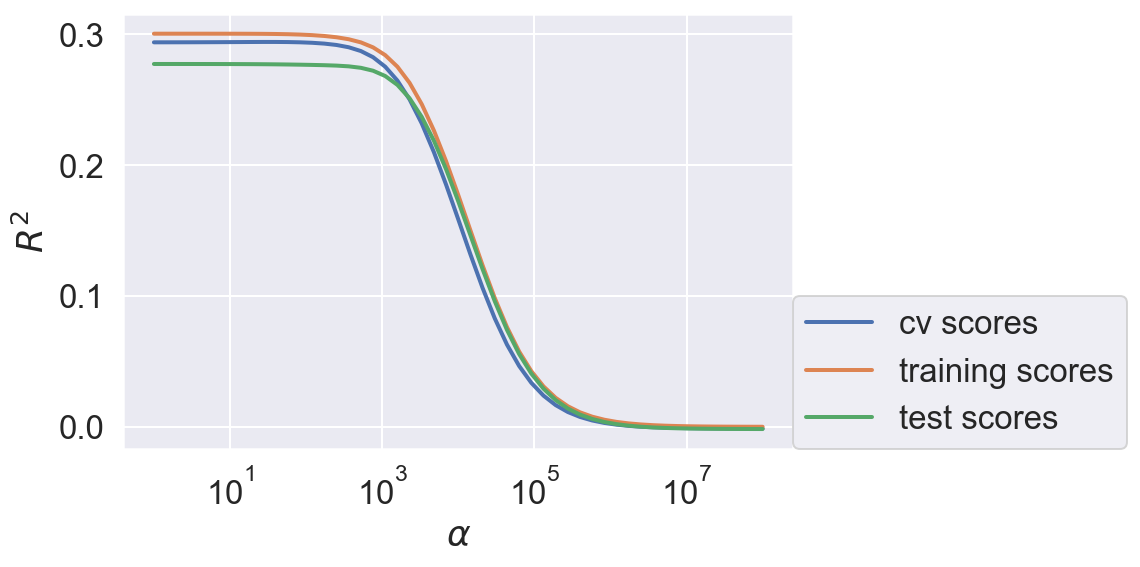

In [40]:
alpha_values = np.logspace(0, 8, 51)
scores = alpha_scores(Ridge, alpha_values=alpha_values)

plt.plot(alpha_values, [score[0] for score in scores], lw=2, label='cv scores')
plt.plot(alpha_values, [score[1]
                        for score in scores], lw=2, label='training scores')
plt.plot(alpha_values, [score[2]
                        for score in scores], lw=2, label='test scores')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc=[1, 0])
plt.show()

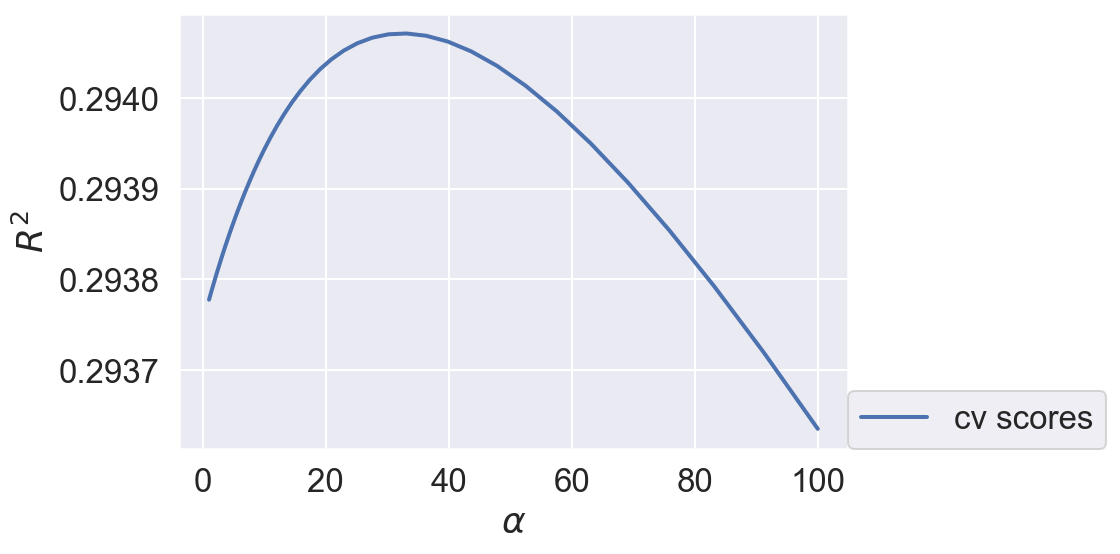

In [41]:
alpha_values = np.logspace(0, 2, 51)
scores = alpha_scores(Ridge, alpha_values=alpha_values)

plt.plot(alpha_values, [score[0] for score in scores], lw=2, label='cv scores')
# plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc=[1, 0])
plt.show()

### Lasso

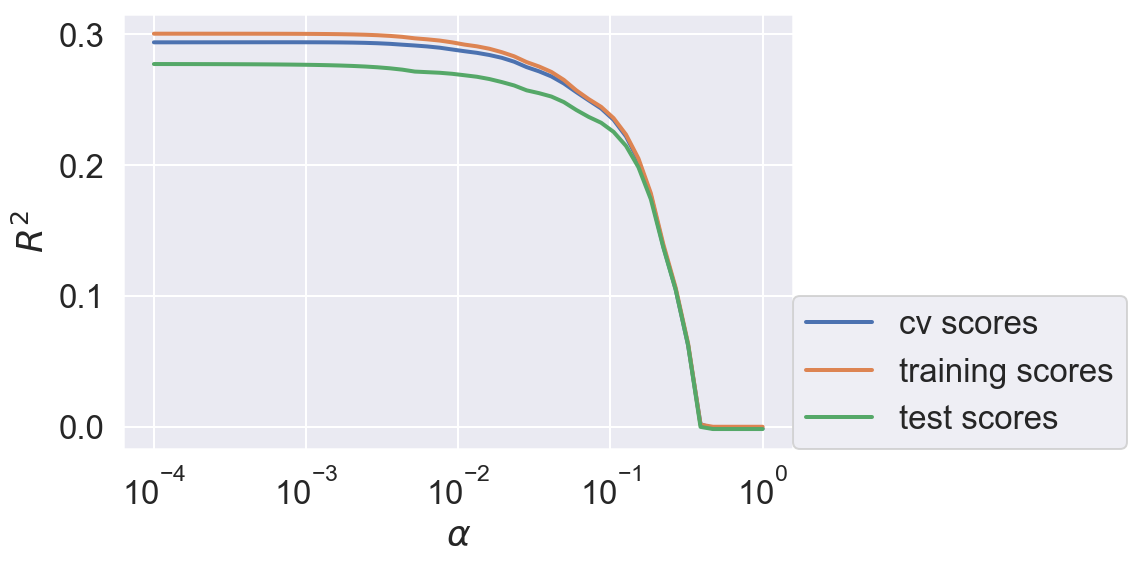

In [42]:
alpha_values = np.logspace(-4, 0, 50)
scores = alpha_scores(Lasso, alpha_values=alpha_values)

plt.plot(alpha_values, [score[0] for score in scores], lw=2, label='cv scores')
plt.plot(alpha_values, [score[1]
                        for score in scores], lw=2, label='training scores')
plt.plot(alpha_values, [score[2]
                        for score in scores], lw=2, label='test scores')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc=[1, 0])
plt.show()

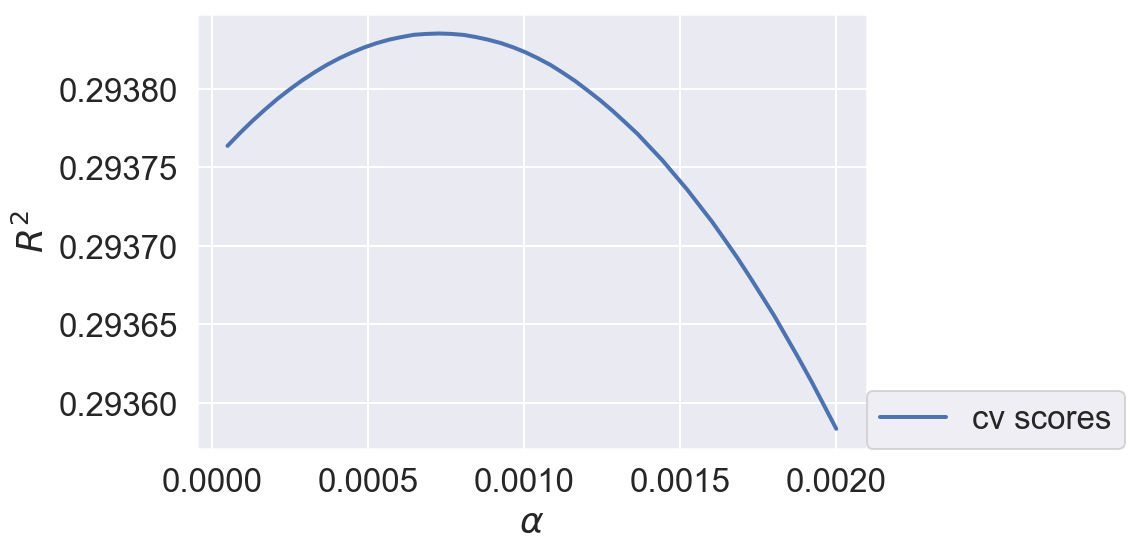

In [43]:
alpha_values = np.linspace(5*10**(-5), 2*10**(-3), 50)
scores = alpha_scores(Lasso, alpha_values=alpha_values)

plt.plot(alpha_values, [score[0] for score in scores], lw=2, label='cv scores')
# plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc=[1, 0])
plt.show()

### Elastic Net

l1 ratio:  0.5
l1 ratio:  0.6
l1 ratio:  0.7
l1 ratio:  0.8
l1 ratio:  0.9


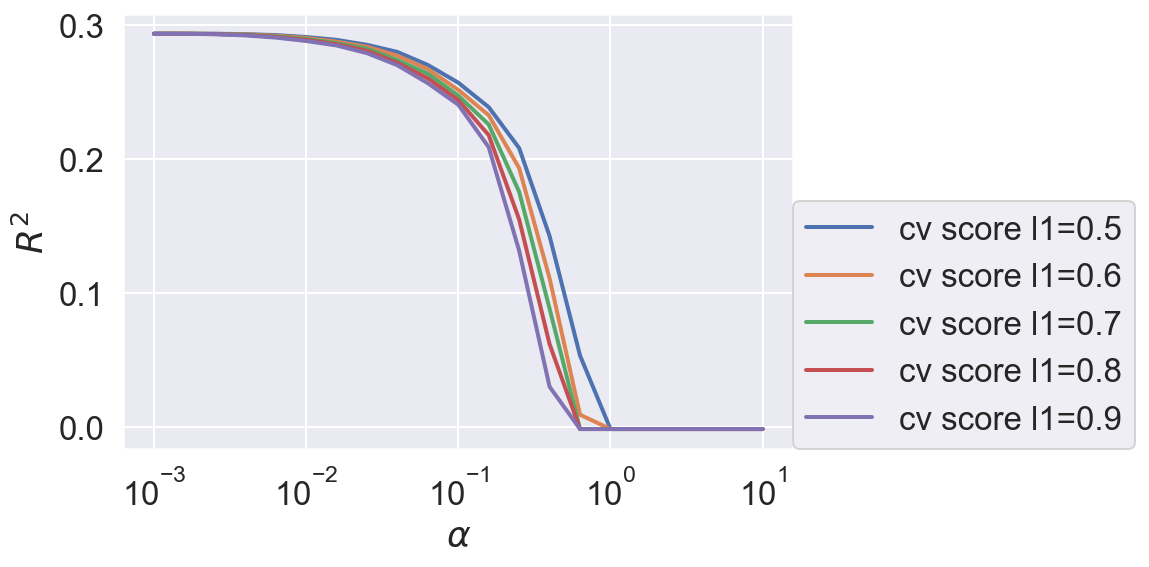

In [44]:
alpha_values = np.logspace(-3, 1, 21)

for l1_ratio in np.linspace(0.5, 0.9, 5):
    print('l1 ratio: ', l1_ratio)
    scores = []

    for alpha in alpha_values:

        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        scores.append(model_fitter(model, X_train, y_train, X_test, y_test))

    plt.plot(alpha_values, [score[0] for score in scores],
             lw=2, label=f'cv score l1={l1_ratio}')

plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc=[1, 0])
plt.show()

l1 ratio:  0.5
l1 ratio:  0.6
l1 ratio:  0.7
l1 ratio:  0.8
l1 ratio:  0.9


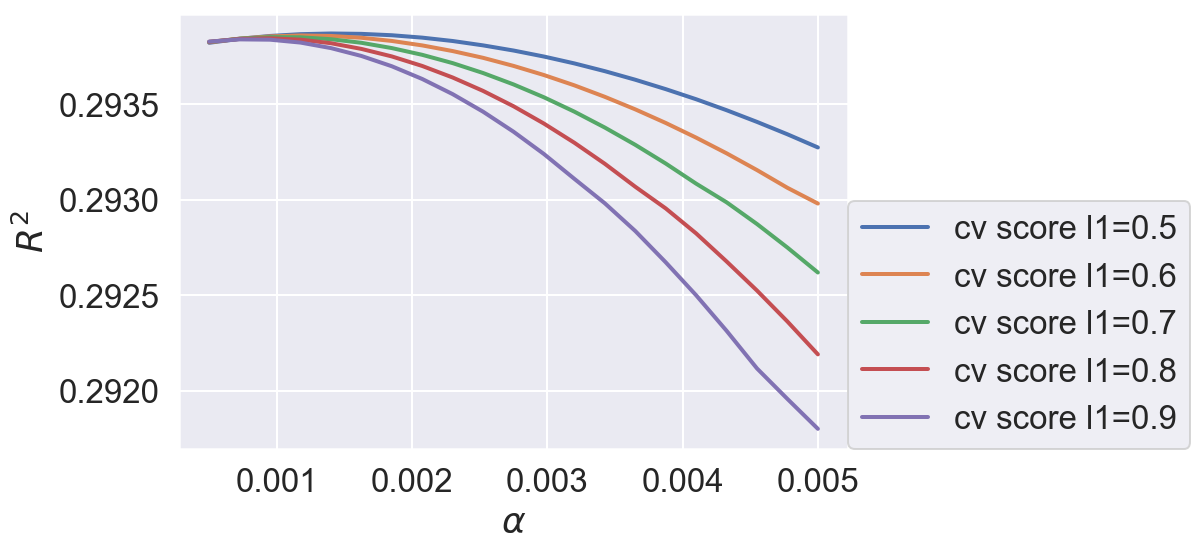

In [45]:
alpha_values = np.linspace(0.5*10**(-3), 0.5*10**(-2), 21)

for l1_ratio in np.linspace(0.5, 0.9, 5):
    print('l1 ratio: ', l1_ratio)
    scores = []

    for alpha in alpha_values:

        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        scores.append(model_fitter(model, X_train, y_train, X_test, y_test))

    plt.plot(alpha_values, [score[0] for score in scores],
             lw=2, label=f'cv score l1={l1_ratio}')

# plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.legend(loc=[1, 0])
plt.show()

## Determining the best regularization strength with cross validation

Finding the right place for zooming in by eye seems challenging.
Fortunately sklearn has algorithms which allow to start a search for a range of regularization strengths and it will select the best value.
Always start with a large enough range of alpha-values and then narrow down on the best value.

In [46]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [47]:
model = LassoCV(alphas=np.logspace(-5, 5, 100), cv=5)
model.fit(X_train, y_train)
print(model.alpha_)

0.0005214008287999684


In [48]:
model.coef_

array([ 0.08325401, -0.24861367, -0.0093191 ,  0.27615419, -0.02292121,
        0.08678971, -0.07536901, -0.27052652,  0.05890734,  0.10614386,
        0.29181316,  0.15240837])

In [49]:
model = RidgeCV(alphas=np.logspace(-5, 5, 100), cv=5)
model.fit(X_train, y_train)
print(model.alpha_)

29.150530628251758


In [50]:
model = ElasticNetCV(l1_ratio=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                     alphas=np.logspace(-5, 5, 100), cv=5)
model.fit(X_train, y_train)
print(model.alpha_)
print(model.l1_ratio_)

0.006734150657750821
0.0001


## Conclusions

We met three different methods for model regularization. They will help us to improve the model generalizability even if we are constructing very complex models. Which parameters are most suitable is determined through cross validation.